In [12]:
import sys
sys.path.append("./python") 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import Environment

Hello,

Attached the python notebook with the Algorithms seen in class: TD, SARSA, Q and code for environments.

Homework : benchmark the  SARSA or Q-Learning in the problem SuttonSimplest and CliffWalking, the ones seen in class.

Play with gamma, learning rate, epsilon, number of episodes and arrive to some conclusions, the ones you want and write down or plot the conclusions as you want.


Then if you want try other environments but be careful we need discrete one dimensional states with the version we built, but we are going to do better in the next class! 
Here are some: GridworldSutton, WindyGridworld

And some OpenAI gym ones: FrozenLake-v0, FrozenLake8x8-v0, Taxi-v2

Best

## Agent Environment Loops for SuttonSimplest and CliffWalking

#### Sutton Simplest MDP environment
States = {A,B} cells ids <br>
Actions = {1 in pyhton 0,  2 in python 1} <br>
<img style="float: left;" src="imgs/SuttonSimple.png" width="320">

In [2]:
env = Environment.Environment("SuttonSimplest")
print("Initial State: %d"%env.reset())

isteps, sum_reward, done = 0, 0, False
observation = env.reset()
while not done and isteps < 10:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("New State: " + str(observation) + "      Reward: " + str(reward))
    sum_reward += reward
    isteps += 1
print("Total obtained reward was: ", sum_reward)
env.close()

Initial State: 0
New State: 0      Reward: 10
New State: 0      Reward: -10
New State: 1      Reward: -10
New State: 1      Reward: 40
New State: 0      Reward: 20
New State: 1      Reward: -10
New State: 0      Reward: 20
New State: 1      Reward: -10
New State: 0      Reward: 20
New State: 0      Reward: -10
Total obtained reward was:  60


#### Cliff Environment from the Sutton and Barto Book:  cliff_walking.py file
States = {0,...,33} cells ids <br>
Actions = {UP 0,RIGHT 1,DOWN 2,LEFT 3} <br>
<img style="float: left;" src="imgs/cliff_env.png" width="320">

In [3]:
env = Environment.Environment("CliffWalking")
print("Initial State: %d"%env.reset())

sum_reward, done = 0, False
observation = env.reset()
while not done:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("New State: " + str(observation) + "      Reward: " + str(reward))
    sum_reward += reward
    
print("Total obtained reward was: ", sum_reward)
env.close()

Initial State: 36
New State: 37      Reward: -100.0
Total obtained reward was:  -100.0


## TD policy evaluation - Value function V

In [4]:
class V_Class():  
    """ Class to store the state Value function
        V(s) = expected future discounted reward from s onwards (the return Gt)
        Stores it as a dictionnary and adds states as encounteded (get method)
        Two methods: get and set
    """
    def __init__(self):       
        self.f = {}
        
    def get(self, s):        
        if(s not in self.f):
            self.f[s] = 0             
        return self.f[s]
    
    def set(self, s, y):
        self.f[s] = y  

In [5]:
env = Environment.Environment("CliffWalking")
V = V_Class()

iepisode = 0
while iepisode < 1000:
    obs = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()
        new_obs, reward, done, info = env.step(action)
        new_Vs = V.get(obs) + 0.3*(reward + 0.9*V.get(new_obs) - V.get(obs)) 
        V.set(obs,new_Vs)
        obs = new_obs
        
    iepisode += 1

print("")
print("State Value Function evaluation for Random Policy")

for key, value in sorted(V.f.items()):
    print(key, round(value,2))


State Value Function evaluation for Random Policy
0 -22.55
1 -24.28
2 -25.1
3 -23.86
4 -24.79
5 -23.47
6 -22.02
7 -26.36
8 -19.14
9 -10.58
10 -5.37
11 -1.83
12 -25.03
13 -36.7
14 -36.35
15 -50.21
16 -32.67
17 -31.31
18 -30.67
19 -48.81
20 -20.64
21 -14.88
22 -13.52
23 -4.04
24 -51.58
25 -60.79
26 -68.98
27 -76.73
28 -55.45
29 -51.78
30 -70.05
31 -73.55
32 -65.45
33 -30.43
34 -47.26
35 -15.59
36 -76.24
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0


## TD policy evaluation (state, action) Value function Q

In [6]:
class Q_Class():  
    """ Class to store the state action Value function Q(s,a)
        Q(s,a) = expected future discounted reward from s taking a onwards 
        Stores it as a dictionnary and adds states as encounteded with all its actions
        Two methods: get and set
    """
    
    def __init__(self, env):       
        self.nactions = env.action_space.n
        self.f = {}
        
    def get(self, s, a=None):        
        if(s not in self.f):
            self.f[s] = [0 for _ in range(self.nactions)]  
        return self.f[s] if a is None else self.f[s][a]
    
    def set(self, s, a, y):
        self.f[s][a] = y  

In [7]:
env = Environment.Environment("CliffWalking")
Q = Q_Class(env)

iepisode = 0
while iepisode < 1000:
    s = env.reset()
    done = False
    a = env.action_space.sample()
    while not done:        
        s_new, reward, done, info = env.step(a)

        a_new = env.action_space.sample()
        #print(s_new, a_new, Q.get(s_new,a_new))

        new_Qa = Q.get(s,a) + 0.3*(reward + 0.9*Q.get(s_new,a_new) - Q.get(s,a))         
        Q.set(s,a,new_Qa)
        
        s,a = s_new,a_new
        
    iepisode += 1

print("")
print("State Value Function evaluation for Random Policy")

for key, value in sorted(Q.f.items()):
    print(key, [round(v,2) for v in value])


State Value Function evaluation for Random Policy
0 [-26.7, -24.11, -36.01, -24.81]
1 [-26.71, -23.95, -32.11, -26.43]
2 [-25.3, -31.71, -29.26, -23.63]
3 [-29.99, -18.41, -53.76, -23.69]
4 [-14.31, -13.84, -23.25, -22.41]
5 [-10.2, -6.4, -16.04, -17.82]
6 [-8.42, -2.13, -11.27, -10.17]
7 [-2.73, -1.35, -11.18, -3.09]
8 [-0.94, -1.24, -1.55, -1.59]
9 [-0.95, -1.84, -0.94, -0.41]
10 [-0.3, -0.51, -3.74, -0.54]
11 [-0.3, 0, -0.46, -0.44]
12 [-25.82, -42.79, -45.97, -33.6]
13 [-25.54, -35.19, -49.58, -33.66]
14 [-23.88, -39.63, -44.26, -29.6]
15 [-19.42, -31.4, -76.65, -31.54]
16 [-18.57, -22.82, -40.8, -27.92]
17 [-11.73, -18.26, -43.54, -28.41]
18 [-6.78, -7.88, -57.38, -13.27]
19 [-0.75, -1.92, -20.13, -21.46]
20 [-1.12, -2.21, -0.65, -1.42]
21 [-1.43, -0.72, -17.06, -1.49]
22 [-0.97, -0.65, -20.2, -1.67]
23 [0, -0.74, 0, -1.16]
24 [-31.17, -37.1, -80.33, -33.05]
25 [-30.36, -58.43, -100.0, -36.83]
26 [-32.08, -56.11, -100.0, -54.06]
27 [-38.4, -42.69, -100.0, -62.42]
28 [-26.16, -64.

# Play with gamma, learning rate, epsilon, number of episodes and arrive to some conclusions, the ones you want and write down or plot the conclusions as you want

## SARSA Optimal Policy through epsilon - Greedy Policy 

In [8]:
class egreedy_Class():
    """ Class for the epsilon greedy policy
        Gets at initialization:
        -environment to store the number of actions in initialization 
        -The Q function
        
        Has method act: 
        -gets state and epsilon as input: acts randomly 
        -
    """
    
    def __init__(self, env, Q):       
        self.nactions = env.action_space.n
        self.Q = Q
    
    def act(self, s, epsilon):                
        if np.random.uniform(0, 1) < epsilon:
            return env.action_space.sample()
        else:
            q_values = self.Q.get(s)
            action = np.argmax(q_values)
            return action


In [74]:
env = Environment.Environment("CliffWalking")
Q = Q_Class(env)
policy = egreedy_Class(env,Q) 

iepisode, epsilon = 0, 1
while iepisode < 1000:
    s = env.reset()
    done = False
    a = policy.act(s,epsilon)
    while not done:        
        s_new, reward, done, info = env.step(a)        
        a_new = policy.act(s_new,epsilon)
        new_Qa = Q.get(s,a) + .03*(reward + .9*Q.get(s_new,a_new) - Q.get(s,a))         
        Q.set(s,a,new_Qa)
        s,a = s_new,a_new
        
    iepisode += 1
    epsilon = max(0.1, epsilon - 1/1000.0)

print("")
print("Q Values for SARSA after 1000 episodes .1 epsilon")

for key, value in sorted(Q.f.items()):
    print(key, [round(v,2) for v in value])


Q Values for Q-learning after 1000 episodes .1 epsilon
0 [-1.0, -1.0, -1.0, -1.0]
1 [-1.0, -1.0, -1.0, -1.0]
2 [-1.0, -1.0, -1.0, -1.0]
3 [-1.0, -1.0, -1.0, -1.0]
4 [-1.0, -1.0, -1.0, -1.0]
5 [-1.0, -1.0, -1.0, -1.0]
6 [-1.0, -1.0, -1.0, -1.0]
7 [-1.0, -1.0, -1.0, -1.0]
8 [-1.0, -1.0, -1.0, -1.0]
9 [-1.0, -1.0, -1.0, -1.0]
10 [-1.0, -1.0, -1.0, -1.0]
11 [-1.0, -1.0, -1.0, -1.0]
12 [-1.0, -1.0, -1.0, -1.0]
13 [-1.0, -1.0, -1.0, -1.0]
14 [-1.0, -1.0, -1.0, -1.0]
15 [-1.0, -1.0, -1.0, -1.0]
16 [-1.0, -1.0, -1.0, -1.0]
17 [-1.0, -1.0, -1.0, -1.0]
18 [-1.0, -1.0, -1.0, -1.0]
19 [-1.0, -1.0, -1.0, -1.0]
20 [-1.0, -1.0, -1.0, -1.0]
21 [-1.0, -1.0, -1.0, -1.0]
22 [-1.0, -1.0, -1.0, -1.0]
23 [-1.0, -1.0, -1.0, -1.0]
24 [-1.0, -1.01, -1.01, -1.0]
25 [-1.0, -1.0, -100.0, -1.0]
26 [-1.0, -1.0, -99.99, -1.1]
27 [-1.0, -1.1, -99.9, -1.0]
28 [-1.0, -1.0, -100.0, -1.0]
29 [-1.0, -1.01, -99.99, -1.0]
30 [-1.0, -1.0, -99.99, -1.0]
31 [-1.0, -1.0, -99.99, -1.01]
32 [-1.0, -1.0, -99.9, -1.01]
33 [-1.0, -

## playing with discount factor and SARSA

gamma values: [0.   0.05 0.15 0.35 0.75]
mean reward over 1000 espisodes: [ -506.874 -3883.118 -1478.514 -1725.584 -1236.607]


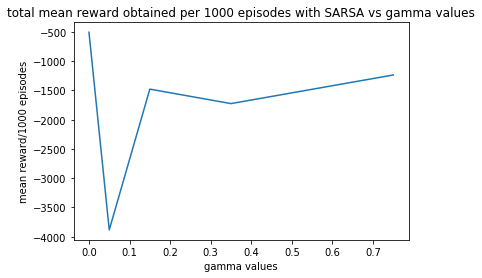

In [48]:
##run a loop of SARSA 
gamma_values=[]
mean_reward_values=[]

gamma = 0
total_mean_reward = 0

while gamma < 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode, epsilon = 0,1
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        a = policy.act(s,epsilon)
        while not done: 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + 0.3*(reward + .01*Q.get(s_new,a_new) - Q.get(s,a))         
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        epsilon = max(0.1, epsilon - 1/1000.0)
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    gamma_values = np.append(gamma_values, gamma)
    gamma += gamma + .05

    
#plot values of mean reward per episode 
plt.plot(gamma_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with SARSA vs gamma values")
plt.xlabel("gamma values")
plt.ylabel("mean reward/1000 episodes")
print("gamma values:", gamma_values)
print("mean reward over 1000 espisodes:", mean_reward_values)



## experimenting with learning rate

learning rate values: [0.  0.1 0.3 0.7]
mean reward over 1000 espisodes: [ -9637.024 -23242.684  -1501.443   -270.078]


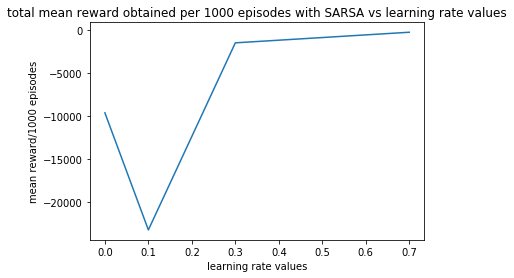

In [68]:
##run a loop of SARSA 
learning_rate_values=[]
mean_reward_values=[]

learning_rate = 0
total_mean_reward = 0

while learning_rate < 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode, epsilon = 0,1
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        a = policy.act(s,epsilon)
        while not done: 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + learning_rate*(reward + .01*Q.get(s_new,a_new) - Q.get(s,a))         
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        epsilon = max(0.1, epsilon - 1/1000.0)
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    learning_rate_values = np.append(learning_rate_values, learning_rate)
    learning_rate += learning_rate + .1

    
#plot values of mean reward per episode 
plt.plot(learning_rate_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with SARSA vs learning rate values")
plt.xlabel("learning rate values")
plt.ylabel("mean reward/1000 episodes")
print("learning rate values:", learning_rate_values)
print("mean reward over 1000 espisodes:", mean_reward_values)

## experimenting with epsilon

epsilon values [0.1 0.3 0.7]
mean reward over 1000 espisodes: [-3020.776  -792.406  -159.398]


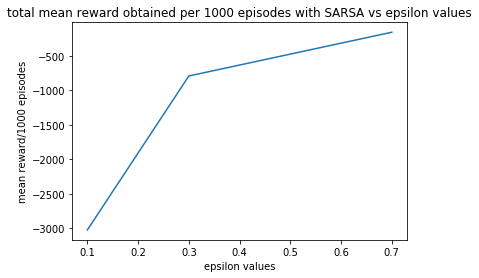

In [53]:
##run a loop of SARSA 
epsilon_values=[]
mean_reward_values=[]

epsilon = .1
total_mean_reward = 0

while epsilon < 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode = 0
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        a = policy.act(s,epsilon)
        while not done: 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + 0.3*(reward + .01*Q.get(s_new,a_new) - Q.get(s,a))         
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    epsilon_values = np.append(epsilon_values, epsilon)
    epsilon += epsilon + .1

    
#plot values of mean reward per episode 
plt.plot(epsilon_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with SARSA vs epsilon values")
plt.xlabel("epsilon values")
plt.ylabel("mean reward/1000 episodes")
print("epsilon values", epsilon_values)
print("mean reward over 1000 espisodes:", mean_reward_values)

## Q-Learning - Off-policy through 1 step look ahead - max operation 

In [81]:
env = Environment.Environment("CliffWalking")
Q = Q_Class(env)
policy = egreedy_Class(env,Q) 

iepisode,epsilon = 0,.1
while iepisode < 1000:
    s = env.reset()
    done = False
    while not done:        
        a = policy.act(s,epsilon)
        s_new, reward, done, info = env.step(a)

        new_Qa = Q.get(s,a) + 0.01*(reward + 0.9*Q.get(s_new,a_new) - Q.get(s,a))         
        Q.set(s,a,new_Qa)
        
        s,a = s_new,a_new
        
    iepisode += 1
    #epsilon = max(0.1, epsilon - 1/1000.0)

print("")
print("Q values with Q learning after 1000 epsisodes with .1 epsilon ")

for key, value in sorted(Q.f.items()):
    print(key, [round(v,2) for v in value])


Q values with Q learning after 1000 epsisodes with .1 epsilon 
0 [-4.72, -4.72, -4.73, -4.73]
1 [-4.62, -4.62, -4.61, -4.62]
2 [-4.45, -4.46, -4.46, -4.45]
3 [-4.26, -4.26, -4.26, -4.26]
4 [-4.05, -4.04, -4.05, -4.05]
5 [-3.81, -3.8, -3.81, -3.81]
6 [-3.55, -3.55, -3.55, -3.55]
7 [-3.28, -3.28, -3.28, -3.28]
8 [-2.98, -2.98, -2.97, -2.98]
9 [-2.66, -2.66, -2.65, -2.66]
10 [-2.34, -2.34, -2.34, -2.34]
11 [-2.09, -2.09, -2.09, -2.09]
12 [-4.82, -4.83, -4.83, -4.83]
13 [-4.67, -4.67, -4.67, -4.67]
14 [-4.48, -4.48, -4.48, -4.48]
15 [-4.26, -4.26, -4.27, -4.28]
16 [-4.04, -4.04, -4.04, -4.04]
17 [-3.8, -3.8, -3.8, -3.8]
18 [-3.54, -3.54, -3.54, -3.54]
19 [-3.26, -3.25, -3.25, -3.25]
20 [-2.93, -2.93, -2.94, -2.94]
21 [-2.58, -2.58, -2.58, -2.58]
22 [-2.19, -2.18, -2.18, -2.19]
23 [-1.78, -1.78, -1.77, -1.78]
24 [-5.04, -5.04, -5.05, -5.04]
25 [-4.75, -4.75, -45.83, -4.75]
26 [-4.5, -4.5, -41.88, -4.5]
27 [-4.27, -4.27, -34.43, -4.27]
28 [-4.04, -4.04, -22.22, -4.03]
29 [-3.78, -3.78, -35.

## experimenting with gamma 


gamma values: [0.   0.05 0.15 0.35 0.75]
mean reward over 1000 espisodes: [-102.458 -215.965 -236.992 -145.41  -179.042]


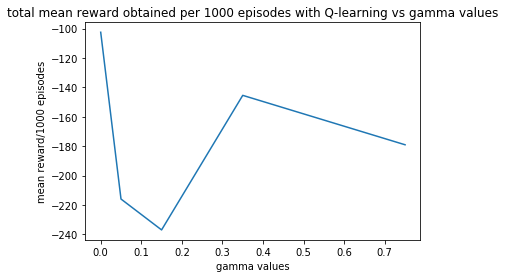

In [58]:
##run a loop of Q-learning with different gamma values

gamma_values=[]
mean_reward_values=[]

gamma = 0
total_mean_reward = 0

while gamma < 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode, epsilon = 0,1
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        while not done:
            a = policy.act(s,epsilon) 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + 0.3*(reward + 0.9*Q.get(s_new,a_new) - Q.get(s,a))          
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        epsilon = max(0.1, epsilon - 1/1000.0)
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    gamma_values = np.append(gamma_values, gamma)
    gamma += gamma + .05

    
#plot values of mean reward per episode 
plt.plot(gamma_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with Q-learning vs gamma values")
plt.xlabel("gamma values")
plt.ylabel("mean reward/1000 episodes")
print("gamma values:", gamma_values)
print("mean reward over 1000 espisodes:", mean_reward_values)


## experimenting with learning rate

learning rate values: [0.  0.1 0.3 0.7]
mean reward over 1000 espisodes: [-8116.213   -71.102  -106.465  -136.774]


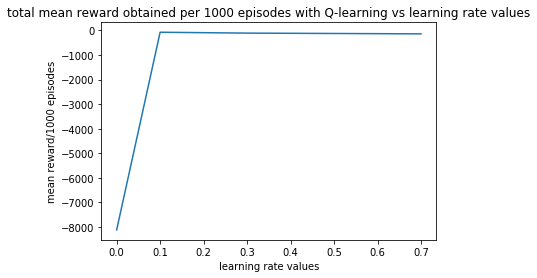

In [60]:
##run a loop of Q-learning with different learning rate values

learning_rate_values=[]
mean_reward_values=[]

learning_rate = 0
total_mean_reward = 0

while learning_rate < 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode, epsilon = 0,1
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        while not done:
            a = policy.act(s,epsilon) 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + learning_rate*(reward + 0.9*Q.get(s_new,a_new) - Q.get(s,a))          
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        epsilon = max(0.1, epsilon - 1/1000.0)
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    learning_rate_values = np.append(learning_rate_values, learning_rate)
    learning_rate += learning_rate + .1

    
#plot values of mean reward per episode 
plt.plot(learning_rate_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with Q-learning vs learning rate values")
plt.xlabel("learning rate values")
plt.ylabel("mean reward/1000 episodes")
print("learning rate values:", learning_rate_values)
print("mean reward over 1000 espisodes:", mean_reward_values)

## experimenting with epsilon

epsilon values: [0.1 0.3 0.7]
mean reward over 1000 espisodes: [-103.627 -104.66  -109.026]


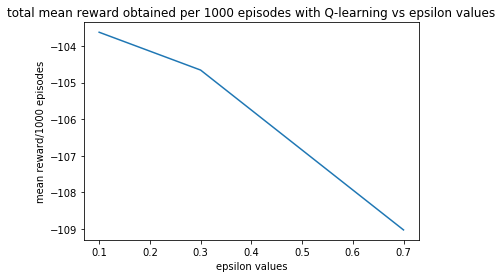

In [66]:
##run a loop of Q-learning with different learning rate values

epsilon_values=[]
mean_reward_values=[]

epsilon = .1
total_mean_reward = 0

while epsilon< 1:
    env = Environment.Environment("CliffWalking")
    Q = Q_Class(env)
    policy = egreedy_Class(env,Q) 

    iepisode = 0
    sum_reward = 0
    while iepisode < 1000:
        s = env.reset()
        done = False
        while not done:
            a = policy.act(s,epsilon) 
            s_new, reward, done, info = env.step(a)        
            a_new = policy.act(s_new,epsilon)
            new_Qa = Q.get(s,a) + learning_rate*(reward + 0.9*Q.get(s_new,a_new) - Q.get(s,a))          
            Q.set(s,a,new_Qa)
            s,a = s_new,a_new
            sum_reward += reward
        iepisode += 1
        
    
    total_mean_reward = (sum_reward/1000.0)
    mean_reward_values = np.append(mean_reward_values, total_mean_reward)
    epsilon_values = np.append(epsilon_values, epsilon)
    epsilon += epsilon + .1

    
#plot values of mean reward per episode 
plt.plot(epsilon_values, mean_reward_values)
plt.title("total mean reward obtained per 1000 episodes with Q-learning vs epsilon values")
plt.xlabel("epsilon values")
plt.ylabel("mean reward/1000 episodes")
print("epsilon values:", epsilon_values)
print("mean reward over 1000 espisodes:", mean_reward_values)